In [1]:
#These lines set up inline plotting, and apply a standard size
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 22})
# Standard includes
from datetime import datetime
import re
import os
import json
import matplotlib.pyplot as plt
from time import time
import timeit
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
from numpy import genfromtxt
import matplotlib.dates as mdates
import numpy.polynomial.polynomial as poly

In [2]:
my_data = pd.read_csv('jobnumbers.csv', header = 0, index_col='S_DATE') 
my_nev  = pd.read_csv('nevents_all.csv', header = 0, index_col='creationtime per day') 

In [3]:
do = datetime.now() + timedelta(1)#datetime.strptime('2018-08-14T18:36:13.0', '%Y-%m-%dT%H:%M:%S.0')
ps = datetime.now() + timedelta(-31)
print(do.day)
print(do.month)
print(do.year)
print(ps.day)
print(ps.month)
print(ps.year)
date = np.arange(np.datetime64('%s-%02d-%02d'%(ps.year,int(ps.month),int(ps.day))),
                np.datetime64('%s-%02d-%02d'%(do.year,int(do.month),int(do.day))))              

6
9
2018
5
8
2018


In [4]:
run_nevents = {}
nidx = 0
for i in my_nev.index:
    do = datetime.fromtimestamp(i/1000.)
    do += timedelta(days=1)
    if not do in run_nevents.keys(): run_nevents[do] = 0
    #print(nidx)
    run_nevents[do] += my_nev['Sum of nevents'][i]
    nidx += 1
names = ['date','nevt']
formats = ['datetime64[D]','f8']
dtype = dict(names = names, formats=formats)
run_nevents_array = np.array(sorted(list(run_nevents.items())), dtype=dtype)
run_nevents_array_dates = np.empty(date.shape,dtype=dtype)
i = 0
for rna in run_nevents_array:   
    if rna[0] in date:
        run_nevents_array_dates[i] = rna
        i += 1
#run_nevents_array = np.where(run_nevents_array==date)
print(run_nevents_array_dates)

[('2018-08-05', 4.46007430e+09) ('2018-08-06', 3.72442808e+09)
 ('2018-08-07', 5.17708780e+09) ('2018-08-08', 4.49812972e+09)
 ('2018-08-09', 7.69808999e+09) ('2018-08-10', 5.15315089e+09)
 ('2018-08-11', 5.16023412e+09) ('2018-08-12', 4.02814968e+09)
 ('2018-08-13', 5.21954744e+09) ('2018-08-14', 5.95220775e+09)
 ('2018-08-15', 2.43559019e+09) ('2018-08-16', 2.07946076e+09)
 ('2018-08-17', 2.89938986e+09) ('2018-08-18', 1.79707802e+09)
 ('2018-08-19', 2.62273607e+09) ('2018-08-20', 2.90974873e+09)
 ('2018-08-21', 2.75271766e+09) ('2018-08-22', 3.00266018e+09)
 ('2018-08-23', 2.58787122e+09) ('2018-08-24', 3.26530975e+09)
 ('2018-08-25', 4.75359084e+09) ('2018-08-26', 2.91090026e+09)
 ('2018-08-27', 2.84820968e+09) ('2018-08-28', 3.29140711e+09)
 ('2018-08-29', 3.21292642e+09) ('2018-08-30', 2.16943224e+09)
 ('2018-08-31', 2.10279680e+09) ('2018-09-01', 2.48930442e+09)
 ('2018-09-02', 2.55700506e+09) ('2018-09-03', 2.19314379e+09)
 ('2018-09-04', 1.43960034e+09) ('2018-09-05', 7.241505

In [5]:
run_slots = {}
nidx = 0
for i in my_data.index:
    do = datetime.strptime(i, '%d-%b-%y %H:%M:%S')
    if not do in run_slots.keys(): run_slots[do] = 0
    run_slots[do] += my_data['SUM'][nidx]
    nidx += 1
names = ['date','slots']
formats = ['datetime64[D]','f8']
dtype = dict(names = names, formats=formats)
run_slots_array = np.array(sorted(list(run_slots.items())), dtype=dtype)
run_slots_array_dates = np.empty(date.shape,dtype=dtype)
i = 0
for rsa in run_slots_array:   
    if rsa[0] in date:
        run_slots_array_dates[i] = rsa
        i += 1
#run_nevents_array = np.where(run_nevents_array==date)
print(run_slots_array_dates)

[('2018-08-05', 59006.) ('2018-08-06', 51383.) ('2018-08-07', 45617.)
 ('2018-08-08', 42046.) ('2018-08-09', 44780.) ('2018-08-10', 53404.)
 ('2018-08-11', 51381.) ('2018-08-12', 49348.) ('2018-08-13', 45534.)
 ('2018-08-14', 60385.) ('2018-08-15', 41337.) ('2018-08-16', 29033.)
 ('2018-08-17', 30816.) ('2018-08-18', 30753.) ('2018-08-19', 32089.)
 ('2018-08-20', 32609.) ('2018-08-21', 33396.) ('2018-08-22', 31599.)
 ('2018-08-23', 31891.) ('2018-08-24', 33683.) ('2018-08-25', 37849.)
 ('2018-08-26', 37607.) ('2018-08-27', 45035.) ('2018-08-28', 28913.)
 ('2018-08-29', 29114.) ('2018-08-30', 27759.) ('2018-08-31', 31201.)
 ('2018-09-01', 31727.) ('2018-09-02', 31425.) ('2018-09-03', 29899.)
 ('2018-09-04', 29300.) ('2018-09-05', 10648.)]


In [6]:
x_slots = []
y_slots = []
x_nev = []
y_nev = []
for i in range(run_slots_array_dates.shape[0]):
    x_slots.append(run_slots_array_dates[:][i][0])
    y_slots.append(run_slots_array_dates[:][i][1])
for i in range(run_nevents_array_dates.shape[0]):
    x_nev.append(run_nevents_array_dates[:][i][0])
    y_nev.append(run_nevents_array_dates[:][i][1])

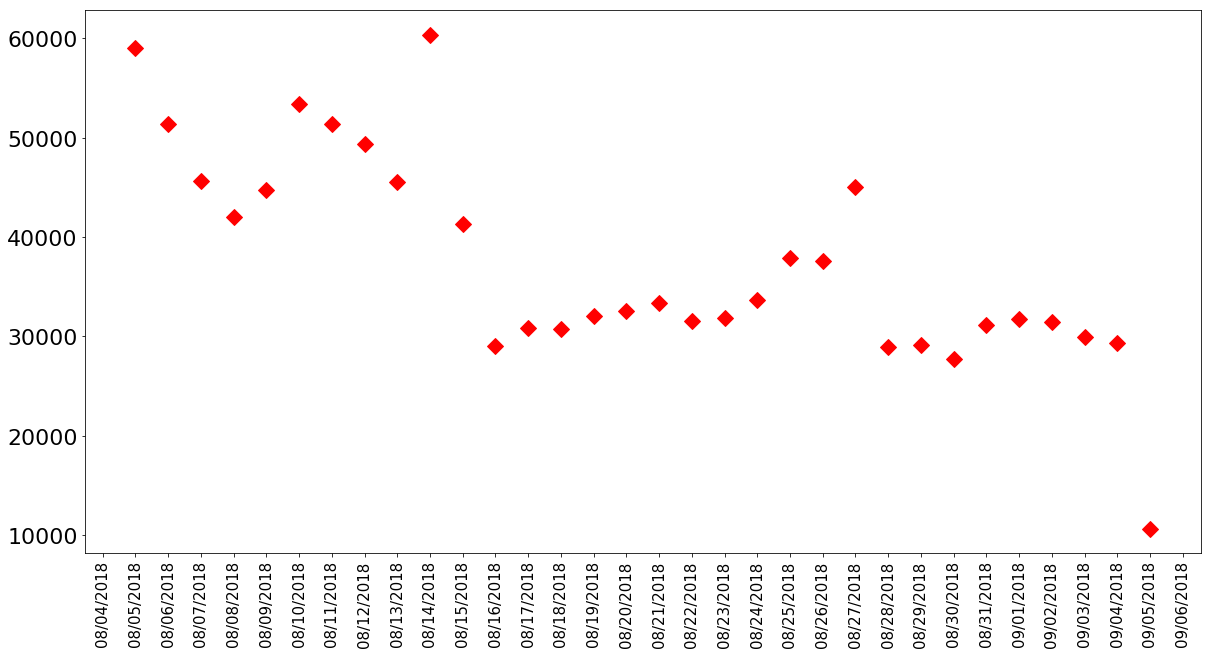

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(np.arange(min(x_slots), max(x_slots),dtype=np.datetime64),rotation='vertical')
ax.tick_params(axis='x', labelsize=15)
lst = plt.plot_date(x_slots,y_slots,marker='D',ms=12,color='r')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

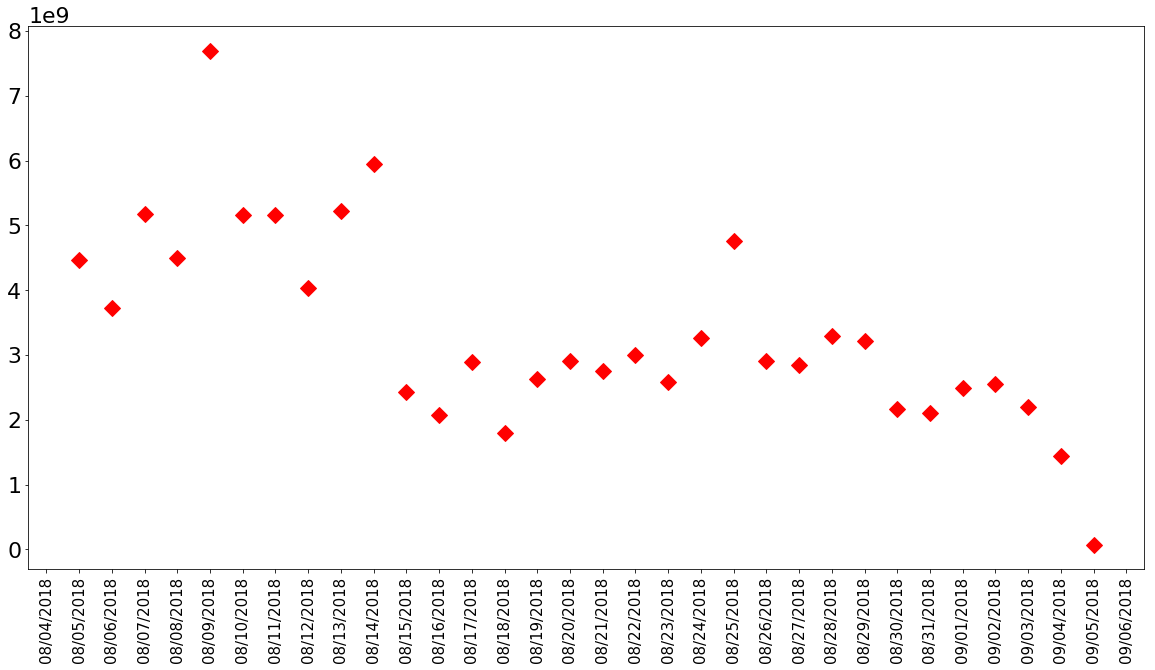

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(np.arange(min(x_nev), max(x_nev),dtype=np.datetime64),rotation='vertical')
ax.tick_params(axis='x', labelsize=15)
lst = plt.plot_date(x_nev,y_nev,marker='D',ms=12,color='r')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

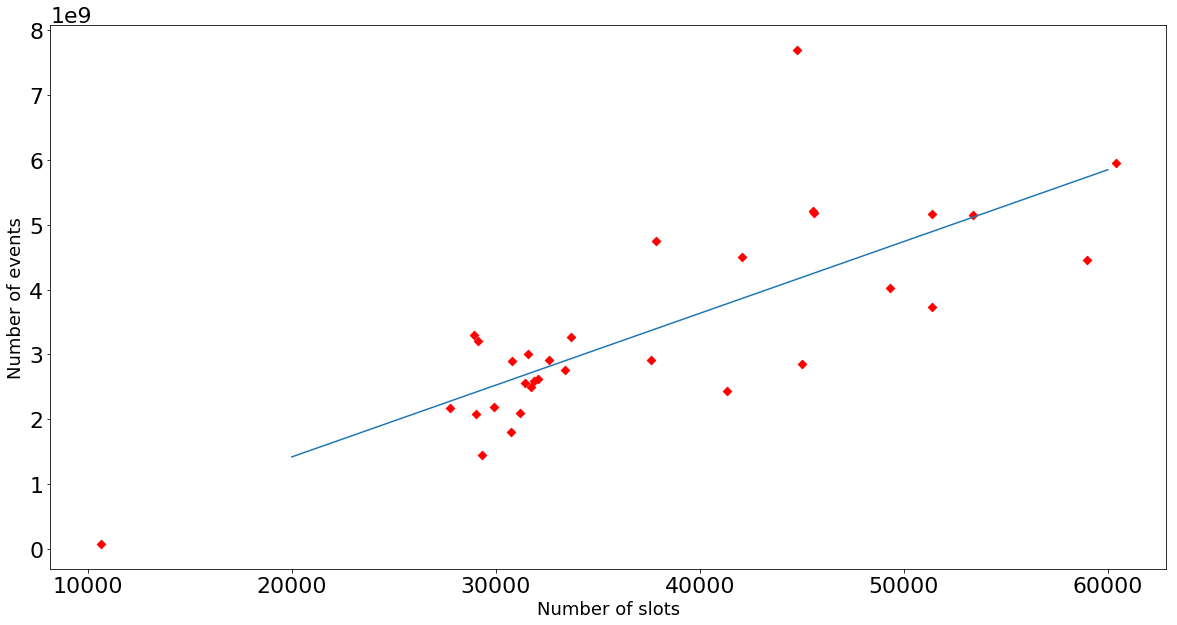

[-7.97366665e+08  1.10764437e+05]


In [12]:
# Generated linear fit
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_slots,y_nev,marker="D",color='r')
ax.set_xlabel('Number of slots',fontsize=18)
ax.set_ylabel('Number of events',fontsize=18)
x_new = np.linspace(20000, 60000, num=len(y_slots)*10)
coefs = poly.polyfit(y_slots,y_nev,deg=1)
ffit = poly.polyval(x_new, coefs)
plt.plot(x_new, ffit)
plt.show()
print(coefs)

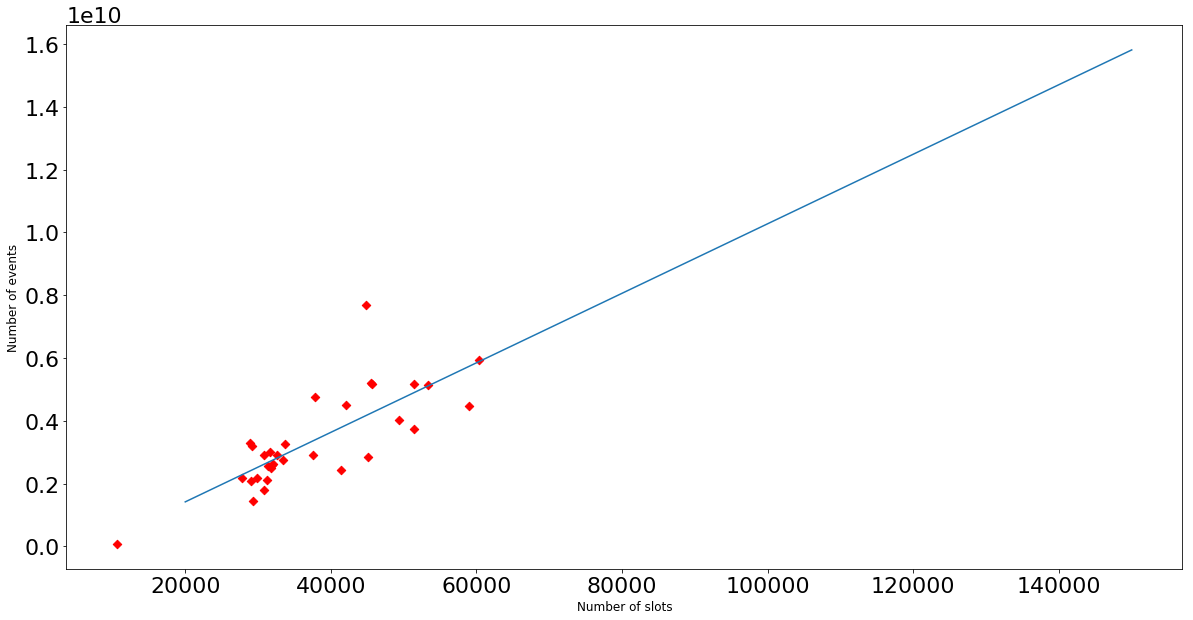

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_slots,y_nev,marker="D",color='r')
ax.set_xlabel('Number of slots',fontsize=12)
ax.set_ylabel('Number of events',fontsize=12)
x_long = np.linspace(20000, 150000, num=len(y_slots)*10)
ffit = poly.polyval(x_long, coefs)
plt.plot(x_long, ffit)
plt.show()

In [15]:
val_ev = 59711000+20000000+19942000
n_trains = 16
print(val_ev)

99653000


In [17]:
total_nev = 16*99653000

In [18]:
total_nev

1594448000